In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
N = int(input("Digite o número de clientes/terminais (N): "))
K = int(input("Digite o número de recursos disponíveis (K): "))

In [4]:
S_recursos = []
V_recursos = []
nomes_recursos = [f"Recurso {i+1}" for i in range(K)]

In [5]:
for i in range(K):
    print(f"Recurso {i + 1}")
    
    # Pedir o Tempo de Serviço (S_i)
    while True:
        try:
            s_i = float(input(f"Digite o Tempo de Serviço (S_{i+1}): "))
            if s_i <= 0:
                print("Erro: O tempo de serviço deve ser um valor positivo.")
            else:
                S_recursos.append(s_i)
                break
        except ValueError:
            print("Erro: Entrada inválida. Digite um número (ex: 0.3).")

    # Pedir o Número de Visitas (V_i)
    while True:
        try:
            v_i = float(input(f"Digite o Número de Visitas (V_{i+1}): "))
            if v_i < 0:
                 print("Erro: O número de visitas não pode ser negativo.")
            else:
                V_recursos.append(v_i)
                break
        except ValueError:
            print("Erro: Entrada inválida. Digite um número.")

Recurso 1
Recurso 2
Recurso 3


In [6]:
while True:
    try:
        Z = float(input("Digite o Tempo de Pensar (Z): "))
        if Z < 0:
            print("Erro: O tempo de pensar não pode ser negativo.")
        else:
            break
    except ValueError:
        print("Erro: Entrada inválida. Digite um número (ex: 4).")

In [7]:
D_recursos = [S_recursos[i] * V_recursos[i] for i in range(K)]
D_total = sum(D_recursos)
D_max = max(D_recursos)
idx_gargalo = np.argmax(D_recursos)

In [9]:
print("\n--- Dados Coletados ---")
print(f"N (Clientes): {N}")
print(f"K (Recursos): {K}")
print(f"Z (Tempo de Pensar): {Z}")
print(f"S (Tempos de Serviço): {S_recursos}")
print(f"V (Visitas): {V_recursos}")

print(f"\n--- Parâmetros Assintóticos ---")
print(f"Demanda por Recurso (D_i): {D_recursos}")
print(f"Demanda Total (D): {D_total:.4f}")
print(f"Demanda Gargalo (D_max): {D_max:.4f} (Recurso {idx_gargalo + 1})")
print(f"Ponto N*: (D+Z)/D_max = {(D_total + Z) / D_max:.2f}")


--- Dados Coletados ---
N (Clientes): 20
K (Recursos): 3
Z (Tempo de Pensar): 0.0
S (Tempos de Serviço): [0.03, 0.025, 0.0057]
V (Visitas): [5.0, 8.0, 14.0]

--- Parâmetros Assintóticos ---
Demanda por Recurso (D_i): [0.15, 0.2, 0.07980000000000001]
Demanda Total (D): 0.4298
Demanda Gargalo (D_max): 0.2000 (Recurso 2)
Ponto N*: (D+Z)/D_max = 2.15


# Análise de MVA para filas fechadas

```Inicialização:
for i = 1 to K do 
    N_i = 0 
for n = 1 to N do 
    begin 
        for i = 1 to k do 
            R_i = S_i * (1 + N_i)

        R = sum from i=1 to k: R_i * V_i

        X_0 = n / (R+Z)

        for i = 1 tp k do
            N_i = X_0 * V_i * R_i

```

In [10]:
hist_n = []
hist_X0 = []
hist_R = []
hist_N_filas = []

N_recursos = list(0 for _ in range(K))

In [11]:
print(f"{'Iteração (n)':<12} | {'X_0 (Throughput)':<16} | {'R (Resp. Sistema)':<18} | {'R (Recursos)':<25} | {'N (Fila Recursos)':<20}")
print("-" * 105)

for n in range(1, N+1):

    R_recursos = list(0 for _ in range(K))
    for i in range(K):
        R_recursos[i] = S_recursos[i] * (1 + N_recursos[i])  # 

    R = 0
    for i in range(K):
        R = R + R_recursos[i] * V_recursos[i]

    X_0 = n / (R + Z)

    for i in range(K):
        N_recursos[i] = X_0 * R_recursos[i] * V_recursos[i]

    hist_n.append(n)
    hist_X0.append(X_0)
    hist_R.append(R)
    hist_N_filas.append(list(N_recursos))
    
    r_formatado = [round(val, 4) for val in R_recursos] 
    n_formatado = [round(val, 3) for val in N_recursos]
    
    print(f"{n:<12} | {X_0:<16.4f} | {R:<18.4f} | {str(r_formatado):<25} | {str(n_formatado)}")

Iteração (n) | X_0 (Throughput) | R (Resp. Sistema)  | R (Recursos)              | N (Fila Recursos)   
---------------------------------------------------------------------------------------------------------
1            | 2.3267           | 0.4298             | [0.03, 0.025, 0.0057]     | [0.349, 0.465, 0.186]
2            | 3.3896           | 0.5900             | [0.0405, 0.0366, 0.0068]  | [0.686, 0.993, 0.321]
3            | 3.9632           | 0.7570             | [0.0506, 0.0498, 0.0075]  | [1.002, 1.58, 0.418]
4            | 4.3035           | 0.9295             | [0.0601, 0.0645, 0.0081]  | [1.292, 2.221, 0.487]
5            | 4.5181           | 1.1067             | [0.0688, 0.0805, 0.0085]  | [1.554, 2.91, 0.536]
6            | 4.6595           | 1.2877             | [0.0766, 0.0978, 0.0088]  | [1.785, 3.644, 0.571]
7            | 4.7557           | 1.4719             | [0.0835, 0.1161, 0.009]   | [1.987, 4.417, 0.596]
8            | 4.8228           | 1.6588             | [0

In [12]:
df_sistema = pd.DataFrame({
        'n (Clientes)': hist_n,
        'MVA (X_0)': hist_X0,
        'MVA (R)': hist_R
    })

In [13]:
n_col = df_sistema['n (Clientes)']

df_sistema['X_Lim_Otimista'] = np.minimum(1 / D_max, n_col / (D_total + Z))
df_sistema['X_Lim_Pessimista'] = n_col / (n_col * D_total + Z)

df_sistema['R_Lim_Otimista'] = np.maximum(D_total, n_col * D_max - Z)
df_sistema['R_Lim_Pessimista'] = n_col * D_total

# --- Preparação de DFs para Gráficos ---
df_filas_wide = pd.DataFrame(hist_N_filas, columns=nomes_recursos)
df_filas_wide['n (Clientes)'] = hist_n

df_filas_long = df_filas_wide.melt(
    'n (Clientes)',
    var_name='Recurso',
    value_name='Tamanho da Fila (N_i)'
)

df_tabela_completa = pd.merge(df_sistema, df_filas_wide, on='n (Clientes)')
nome_arquivo = 'resultados_mva_exato_com_limites.csv'
df_tabela_completa.to_csv(nome_arquivo, index=False)
print(f"\nResultados salvos com sucesso em '{nome_arquivo}'!")


Resultados salvos com sucesso em 'resultados_mva_exato_com_limites.csv'!


In [14]:
# calculo de N*
N_star = (D_total + Z) / D_max
print(f"\nPonto N* calculado: {N_star:.2f}")


Ponto N* calculado: 2.15


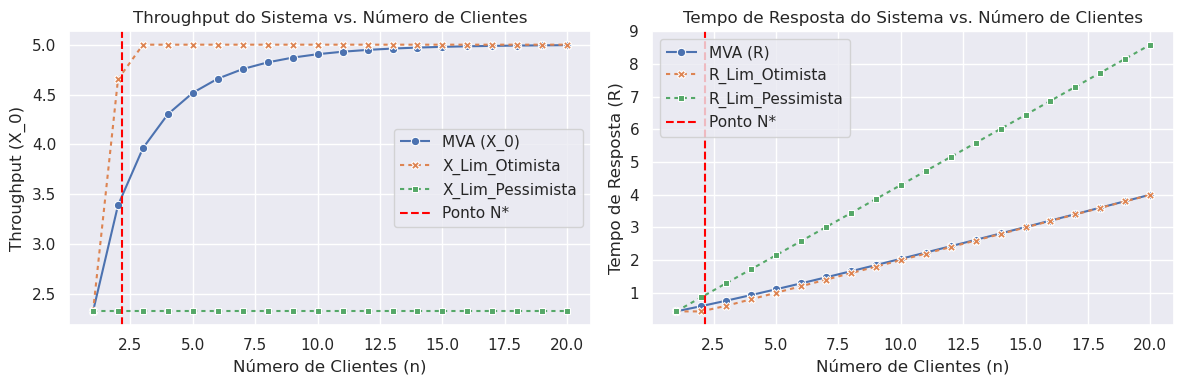

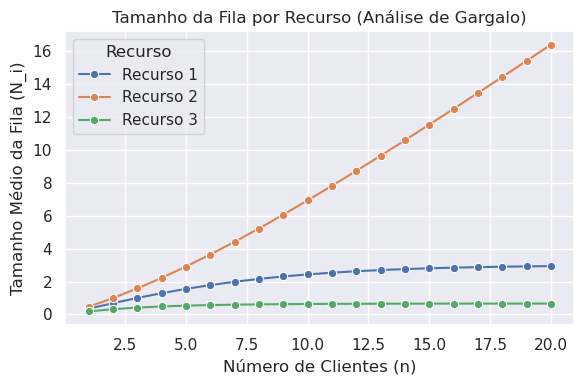

In [15]:
sns.set_theme(style="darkgrid")

# Prepara os dataframes
df_throughput_plot = df_sistema.melt(
    'n (Clientes)',
    value_vars=['MVA (X_0)', 'X_Lim_Otimista', 'X_Lim_Pessimista'],
    var_name='Métrica',
    value_name='Throughput'
)

df_response_plot = df_sistema.melt(
    'n (Clientes)',
    value_vars=['MVA (R)', 'R_Lim_Otimista', 'R_Lim_Pessimista'],
    var_name='Métrica',
    value_name='Tempo de Resposta'
)

# Cria figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico 1: Throughput
sns.lineplot(
    data=df_throughput_plot,
    x='n (Clientes)',
    y='Throughput',
    hue='Métrica',
    style='Métrica',
    markers=True,
    dashes={'MVA (X_0)': (1, 0), 'X_Lim_Otimista': (2, 2), 'X_Lim_Pessimista': (2, 2)},
    ax=axes[0]
)
axes[0].set_title('Throughput do Sistema vs. Número de Clientes')
axes[0].set_xlabel('Número de Clientes (n)')
axes[0].set_ylabel('Throughput (X_0)')

# Gráfico 2: Tempo de Resposta
sns.lineplot(
    data=df_response_plot,
    x='n (Clientes)',
    y='Tempo de Resposta',
    hue='Métrica',
    style='Métrica',
    markers=True,
    dashes={'MVA (R)': (1, 0), 'R_Lim_Otimista': (2, 2), 'R_Lim_Pessimista': (2, 2)},
    ax=axes[1]
)
axes[1].set_title('Tempo de Resposta do Sistema vs. Número de Clientes')
axes[1].set_xlabel('Número de Clientes (n)')
axes[1].set_ylabel('Tempo de Resposta (R)')

# adicionar ponto de saturação N*
for ax in axes:
    ax.axvline(x=N_star, color='red', linestyle='--', label='Ponto N*')
    ax.legend()

plt.tight_layout()
plt.show()

# Gráfico 3: Tamanho da Fila (N_i) vs. n (Análise de Gargalo)
plt.figure(figsize=(6, 4))
sns.lineplot(
        data=df_filas_long,
        x='n (Clientes)',
        y='Tamanho da Fila (N_i)',
        hue='Recurso',
        marker='o'
    )
plt.title('Tamanho da Fila por Recurso (Análise de Gargalo)')
plt.xlabel('Número de Clientes (n)')
plt.ylabel('Tamanho Médio da Fila (N_i)')
plt.tight_layout()


---

# Algoritmo MVA Aproximado

```
for i = 1 to K do
    N_i = N/K
while max_i{|N_i - X_0*R_i*V_i|} > epslon do
    for i = 1 to k do 
        R_i = S_i * (1 + N_i)

    R = sum from i=1 to k: R_i * V_i

    X_0 = n / (R+Z)

    for i = 1 tp k do
        N_i = X_0 * V_i * R_i
        
```

In [15]:
hist_n = []
hist_X0 = []
hist_R = []
hist_N_filas = []

N_recursos = list(N/K for _ in range(K))

epslon = 0.001
# epslon = 0.001

X0 = N / sum(V_recursos)

In [16]:
print(f"{'Iteração':<12} | {'X_0 (Throughput)':<16} | {'R (Sistema)':<18} | {'R (Recursos)':<25} | {'N (Fila)':<30} | {'Max Diff':<10}")
print("-" * 115)

iter_count = 1

while True:
    N_recursos_old = list(N_recursos) # recursos antigos

    R_recursos = list(0 for _ in range(K))
    for i in range(K):
        R_recursos[i] = S_recursos[i] * (1 + ((N - 1) / N) * N_recursos_old[i])

    R = 0
    for i in range(K):
        R = R + R_recursos[i] * V_recursos[i]

    X_0 = n / (R + Z)

    for i in range(K):
        N_recursos[i] = X_0 * R_recursos[i] * V_recursos[i]

    hist_n.append(n)
    hist_X0.append(X_0)
    hist_R.append(R)
    hist_N_filas.append(list(N_recursos))

    max_diff = max(abs(N_recursos[i] - N_recursos_old[i]) for i in range(K))
    if max_diff < epslon:
        break

    r_formatado = [round(val, 4) for val in R_recursos]
    n_formatado = [round(val, 3) for val in N_recursos]
    
    print(f"{iter_count:<12} | {X_0:<16.4f} | {R:<18.4f} | {str(r_formatado):<25} | {str(n_formatado):<30} | {max_diff:<10.4f}")

    if max_diff < epslon:
        break  # Convergiu
    
    iter_count += 1 


print(f"{iter_count:<12} | {X_0:<16.4f} | {R:<18.4f} | {str(r_formatado):<25} | {str(n_formatado):<30} | {max_diff:<10.4f}")
print("\n" + "=" * 40)
print("Resultado final após convergência:")
print(f"Iterações totais: {iter_count}")
print(f"Throughput (X_0): {X_0:.4f}")
print(f"Resp. Sistema (R): {R:.4f}")
print("-" * 40)

for i in range(K):
    print(f"Recurso {i+1}:")
    print(f"  Tempo Resposta (R_{i}): {R_recursos[i]:.4f}")
    print(f"  Tam. Fila (N_{i}):     {N_recursos[i]:.4f}")

Iteração     | X_0 (Throughput) | R (Sistema)        | R (Recursos)              | N (Fila)                       | Max Diff  
-------------------------------------------------------------------------------------------------------------------
1            | 1.2968           | 18.1333            | [0.32, 0.2667, 0.4267]    | [8.3, 1.383, 13.833]           | 8.6167    
2            | 1.1991           | 20.0193            | [0.2707, 0.0584, 0.5749]  | [6.492, 0.28, 17.233]          | 3.3999    
3            | 1.1049           | 22.1506            | [0.2183, 0.0318, 0.7063]  | [4.823, 0.14, 19.512]          | 2.2788    
4            | 1.0574           | 23.3723            | [0.1699, 0.0284, 0.7944]  | [3.592, 0.12, 21.001]          | 1.4891    
5            | 1.0311           | 24.0958            | [0.1342, 0.0279, 0.852]   | [2.767, 0.115, 21.963]         | 0.9619    
6            | 1.0154           | 24.5465            | [0.1102, 0.0278, 0.8892]  | [2.239, 0.113, 22.572]         | 0.6092

In [ ]:
df_sistema_aprox = pd.DataFrame({
            'Iteração': hist_n,
            'Throughput (X_0)': hist_X0,
            'Tempo de Resposta (R)': hist_R
        })

In [18]:
df_filas_wide = pd.DataFrame(hist_N_filas, columns=nomes_recursos)
df_filas_wide['n (Clientes)'] = hist_n

df_filas_long = df_filas_wide.melt('n (Clientes)', 
                                 var_name='Recurso', 
                                 value_name='Tamanho da Fila (N_i)')

# adicionar salvar a tabela principal em um csv
df_tabela_completa = pd.merge(df_sistema, df_filas_wide, on='n (Clientes)')

nome_arquivo = 'resultados_simulacao_aprox.csv'
df_tabela_completa.to_csv(nome_arquivo, index=False)

print(f"\nResultados salvos com sucesso em '{nome_arquivo}'!")


Resultados salvos com sucesso em 'resultados_simulacao_aprox.csv'!


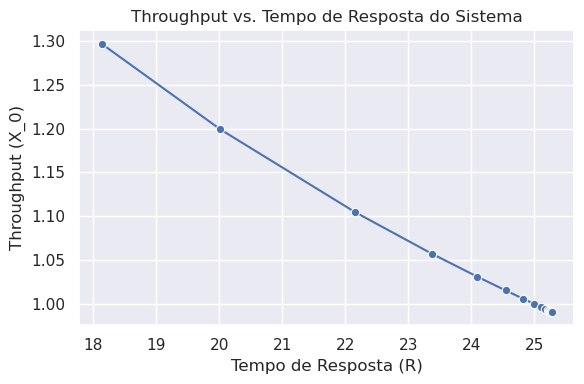

In [ ]:
sns.set_theme(style="darkgrid")

# Gráfico 4: Throughput (X_0) vs. Tempo de Resposta (R)
plt.figure(figsize=(6, 4))
sns.lineplot(data=df_sistema, x='Tempo de Resposta (R)', y='Throughput (X_0)', marker='o')
plt.title('Throughput vs. Tempo de Resposta do Sistema')
plt.xlabel('Tempo de Resposta (R)')
plt.ylabel('Throughput (X_0)')
plt.tight_layout()
plt.show()
